## 数据增广

比如说，可以对图片，颜色，像素做很多变换。

- [https://github.com/aleju/imgaug](https://github.com/aleju/imgaug)提供了几十种数据增广的方法。

<class 'PIL.JpegImagePlugin.JpegImageFile'>


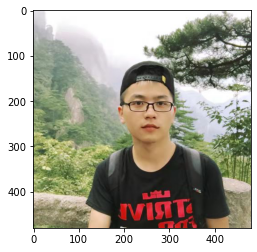

In [9]:
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('../images/tinyzqh.jpg')  # 读取图片
plt.imshow(img)  # imshow展示图片。

In [2]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [3]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    """
    img: 给定一张图片img。
    aug: 给定一种数据增广的方法。
    num_rows * num_cols 表示对这张图片做多少次数据增广。
    scale: 表示这张图片多大。
    """
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale=scale)

## 左右翻转图像

`RandomHorizontalFlip()`在水平方向随机地进行翻转。

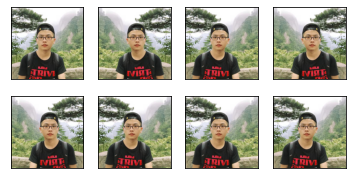

In [4]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

## 上下翻转

`RandomVerticalFlip()`上下翻转图片。但是并不是每种图片都可以上下翻转，需要视情况而定。

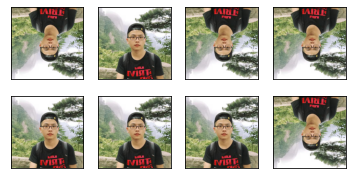

In [5]:
apply(img, torchvision.transforms.RandomVerticalFlip())

## 随机裁剪

`RandomResizedCrop()`随机裁剪图片。

1. 第一个参数为：裁剪之后的图片大小为(200 * 200)。
2. 第二个参数为：需要保存多少原始图片，scale=(0.1, 1)表示从百分之10到百分之百。
3. 第三个参数为：高宽比，ratio=（0.5， 2）表示要么为1:2， 要么为2:1。

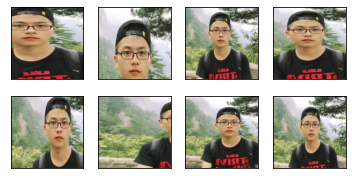

In [11]:
shape_aug = torchvision.transforms.RandomResizedCrop((200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

## 随机更改图像的亮度

参数:

1. brightness表示亮度，0.5表示增加百分之五十，或者减少百分之五十。
2. contrast表示对比度，0表示不改变。
3. saturation表示颜色。
4. hue表示色调。

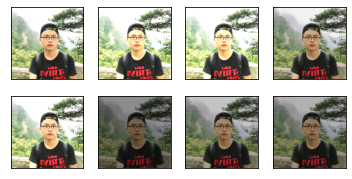

In [14]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5, contrast=0, saturation=0, hue=0))

## 随机更改图像的色调

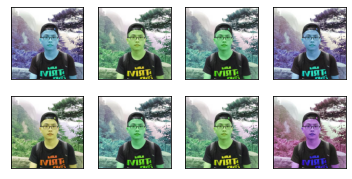

In [15]:
# 色调
apply(img, torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.5))



创建一个RandomColorJitter实例，设置同时随机更改图像的亮度(brightness)、对比度(contrast)、饱和度(saturation)和色调(hue)。

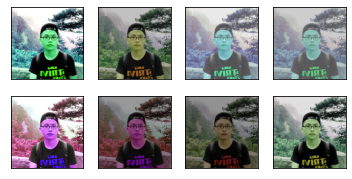

In [16]:
color_aug = torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

## 组合多种增广

实际中，结合多种图像增广方法。采用`Compose`实例来综合上面定义的不同的图像增广方法，并将它们应用到每个图像。

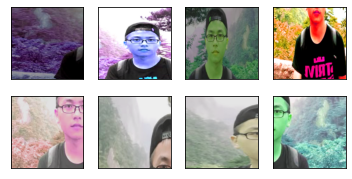

In [17]:
augs = torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

更多的将其应用于训练的教程在: https://zh-v2.d2l.ai/chapter_computer-vision/image-augmentation.html。